In [139]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
#mouse_drug_data_to_load = "data/mouse_drug_data.csv"
#clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
mouse_clinical_combined = pd.merge(clinical_trial, mouse_drug,how='left', on="Mouse ID")

# Display the data table for preview

mouse_clinical_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [140]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combined_group_mean = mouse_clinical_combined.groupby(["Drug","Timepoint"]).mean()
combined_group_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_mean_df = pd.DataFrame(combined_group_mean)
#del tumor_response_mean_df['Metastatic Sites']
tumor_response_mean_df1 = tumor_response_mean_df.drop('Metastatic Sites', 1)
# Preview DataFrame
tumor_response_mean_df1.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [2]:
#sample, skip

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [141]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combined_group_sem = mouse_clinical_combined.groupby(["Drug","Timepoint"]).sem()
combined_group_sem.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_sem_df = pd.DataFrame(combined_group_sem)
#del tumor_response_sem_df['Metastatic Sites']
tumor_response_sem_df = tumor_response_sem_df.drop(tumor_response_sem_df.columns[[2, 3]], axis=1)
# Preview DataFrame
tumor_response_sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [3]:
#sample, skip

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [142]:
# Minor Data Munging to Re-Format the Data Frames
formatted_table = tumor_response_mean_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
formatted_table.reset_index(level = None, inplace = True)


# Preview that Reformatting worked
formatted_table.head()

#Remove Index

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [4]:
#sample, skip

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


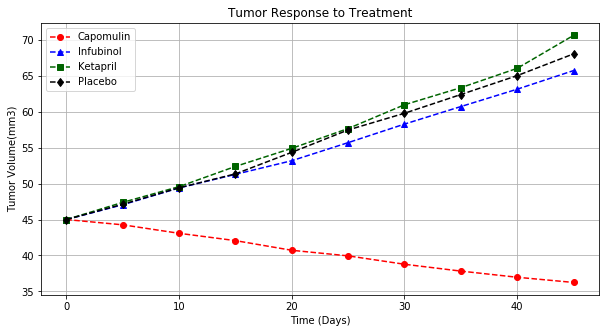

<Figure size 432x288 with 0 Axes>

In [143]:
#Save & Lookup Colours & markers
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10, 5))
plt.errorbar(x=formatted_table['Timepoint'],y=formatted_table['Capomulin'], yerr=None, linestyle="--", color='red', marker='o')
plt.errorbar(x=formatted_table['Timepoint'],y=formatted_table['Infubinol'], yerr=None, linestyle="--", color='blue', marker='^')
plt.errorbar(x=formatted_table['Timepoint'],y=formatted_table['Ketapril'], yerr=None, linestyle="--",color='DarkGreen', marker='s')
plt.errorbar(x=formatted_table['Timepoint'],y=formatted_table['Placebo'], yerr=None, linestyle="--", color='black', marker='d')

plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.grid()
plt.legend() 

plt.show()
# Save the Figure

plt.savefig("f_TumorResponse.png")


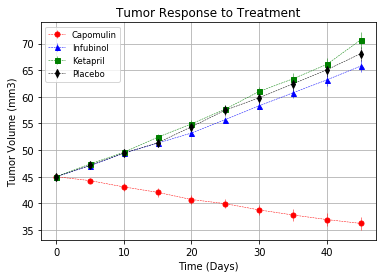

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [144]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_group_mean_met= mouse_clinical_combined.groupby(["Drug","Timepoint"]).mean()
# Convert to DataFrame
met_response_df = pd.DataFrame(combined_group_mean_met["Metastatic Sites"])
# Preview DataFrame
met_response_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [6]:
#Sample, Skip

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [145]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
combined_group_met_sem = mouse_clinical_combined.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
met_response_sem_df = pd.DataFrame(combined_group_met_sem["Metastatic Sites"])
                                   
# Preview DataFrame
met_response_sem_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [7]:
#Sample, Skip

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [146]:
# Minor Data Munging to Re-Format the Data Frames
met_response_df.reset_index(level = None, inplace = True)
met_response_df2 = pd.DataFrame(combined_group_mean)

pivot_table_met = met_response_df2.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
pivot_table_met.reset_index(level = None, inplace = True)

# Preview that Reformatting worked
pivot_table_met.head()



Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [127]:
#Sample, Skip

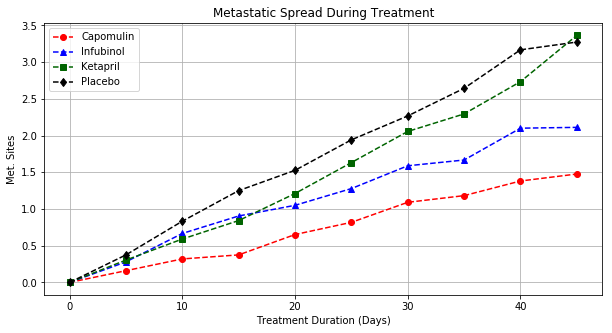

In [147]:

# Generate the Plot (with Error Bars) 
plt.figure(figsize = (10, 5))


plt.errorbar(x=pivot_table_met['Timepoint'],y=pivot_table_met['Capomulin'], yerr=None, linestyle="--", color='red', marker='o')
plt.errorbar(x=pivot_table_met['Timepoint'],y=pivot_table_met['Infubinol'], yerr=None, linestyle="--", color='blue', marker='^')
plt.errorbar(x=pivot_table_met['Timepoint'],y=pivot_table_met['Ketapril'], yerr=None, linestyle="--",color='DarkGreen', marker='s')
plt.errorbar(x=pivot_table_met['Timepoint'],y=pivot_table_met['Placebo'], yerr=None, linestyle="--", color='black', marker='d')

plt.ylabel("Met. Sites")
plt.xlabel('Treatment Duration (Days)')
plt.title('Metastatic Spread During Treatment')
plt.grid()
plt.legend()       

# Save the Figure
plt.savefig("f_MetStatResponse.png")
# Show the Figure
plt.show()

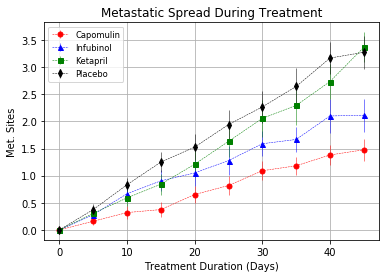

## Survival Rates

In [148]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount=mouse_clinical_combined.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
micecount_df=pd.DataFrame(micecount["Mouse ID"])
micecount_df.reset_index(inplace=True)

# Preview DataFrame
micecount_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [10]:
#Sample, Skip

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [149]:
# Minor Data Munging to Re-Format the Data Frames
formatted_pivot_table_mice = micecount_df.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")
formatted_pivot_table_mice.reset_index(level = None, inplace = True)

#Preview the formatted table
formatted_pivot_table_mice.head()



Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [150]:
#Calculations for the survival rate

survival_mice_table_df = formatted_pivot_table_mice.astype(float)
survival_mice_table_df["Capomulin_percent"]=survival_mice_table_df["Capomulin"]/survival_mice_table_df["Capomulin"].iloc[0] * 100
survival_mice_table_df["Infubinol_percent"]=survival_mice_table_df["Infubinol"]/survival_mice_table_df["Infubinol"].iloc[0] * 100
survival_mice_table_df["Ketapril_percent"]=survival_mice_table_df["Ketapril"]/survival_mice_table_df["Ketapril"].iloc[0] * 100
survival_mice_table_df["Placebo_percent"]=survival_mice_table_df["Placebo"]/survival_mice_table_df["Placebo"].iloc[0] * 100
survival_mice_table_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Capomulin_percent,Infubinol_percent,Ketapril_percent,Placebo_percent
0,0.0,25.0,25.0,25.0,25.0,25.0,25.0,26.0,25.0,26.0,25.0,100.0,100.0,100.0,100.0
1,5.0,25.0,21.0,25.0,23.0,23.0,24.0,25.0,25.0,25.0,24.0,100.0,100.0,92.0,96.0
2,10.0,25.0,20.0,21.0,22.0,21.0,24.0,23.0,24.0,23.0,22.0,100.0,84.0,88.0,96.0
3,15.0,24.0,19.0,21.0,19.0,21.0,20.0,17.0,24.0,23.0,21.0,96.0,84.0,76.0,80.0
4,20.0,23.0,18.0,20.0,19.0,20.0,19.0,17.0,23.0,21.0,17.0,92.0,80.0,76.0,76.0


In [11]:
#Sample, Skip

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


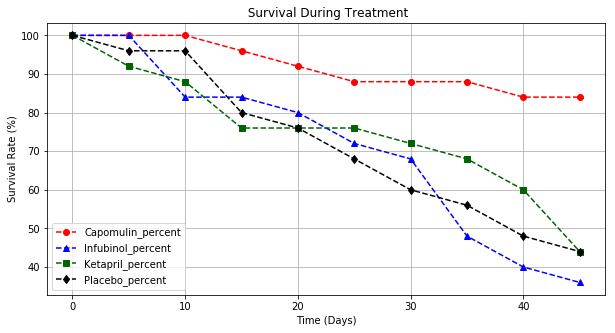

In [151]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (10, 5))

plt.errorbar(x=survival_mice_table_df ['Timepoint'],y=survival_mice_table_df['Capomulin_percent'], linestyle="--", color='red', marker='o')
plt.errorbar(x=survival_mice_table_df['Timepoint'],y=survival_mice_table_df['Infubinol_percent'], linestyle="--", color='blue', marker='^')
plt.errorbar(x=survival_mice_table_df['Timepoint'],y=survival_mice_table_df['Ketapril_percent'], linestyle="--", color='DarkGreen', marker='s')
plt.errorbar(x=survival_mice_table_df['Timepoint'],y=survival_mice_table_df['Placebo_percent'], linestyle="--", color='black', marker='d')

plt.ylabel("Survival Rate (%)")
plt.xlabel('Time (Days)')
plt.title(' Survival During Treatment')
plt.grid()
plt.legend()       


# Save the Figure
plt.savefig("f_SurvivalRespnse.png")
# Show the Figure
plt.show()




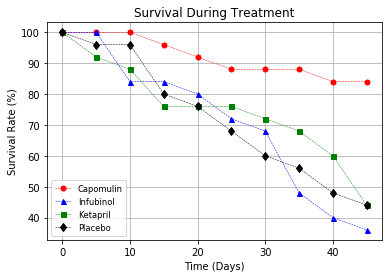

## Summary Bar Graph

In [152]:
# Calculate the percent changes for each drug
# Calculate the percent changes for Each Drug; Should create for loop

capomulin_percent=(formatted_table["Capomulin"].iloc[9]-formatted_table["Capomulin"].iloc[0])/formatted_table["Capomulin"].iloc[0]*100
infubinol_percent=(formatted_table["Infubinol"].iloc[9]-formatted_table["Infubinol"].iloc[0])/formatted_table["Infubinol"].iloc[0]*100
ketapril_percent=(formatted_table["Ketapril"].iloc[9]-formatted_table["Ketapril"].iloc[0])/formatted_table["Ketapril"].iloc[0]*100
placebo_percent=(formatted_table["Placebo"].iloc[9]-formatted_table["Placebo"].iloc[0])/formatted_table["Placebo"].iloc[0]*100
ceftamin_percent=(formatted_table["Ceftamin"].iloc[9]-formatted_table["Ceftamin"].iloc[0])/formatted_table["Ceftamin"].iloc[0]*100
naftisol_percent=(formatted_table["Naftisol"].iloc[9]-formatted_table["Naftisol"].iloc[0])/formatted_table["Naftisol"].iloc[0]*100
stelasyn_percent=(formatted_table["Stelasyn"].iloc[9]-formatted_table["Stelasyn"].iloc[0])/formatted_table["Stelasyn"].iloc[0]*100
ramicane_percent=(formatted_table["Ramicane"].iloc[9]-formatted_table["Ramicane"].iloc[0])/formatted_table["Ramicane"].iloc[0]*100
propriva_percent=(formatted_table["Propriva"].iloc[9]-formatted_table["Propriva"].iloc[0])/formatted_table["Propriva"].iloc[0]*100
zoniferol_percent=(formatted_table["Zoniferol"].iloc[9]-formatted_table["Zoniferol"].iloc[0])/formatted_table["Zoniferol"].iloc[0]*100











In [153]:
# Store all Relevant Percent Changes into a Tuple
# Store all Percent Changes into a Tuple
percent_tuple = {'Capomulin': capomulin_percent, 'Ceftamin':ceftamin_percent, 'Infubinol': infubinol_percent, 'Ketapril': ketapril_percent, 'Naftisol':naftisol_percent, 'Placebo': placebo_percent, 'Propriva': propriva_percent, 'Ramicane':ramicane_percent, 'Stelasyn': stelasyn_percent, 'Zoniferol': zoniferol_percent}
percentchange_tumorvolume = pd.Series(percent_tuple)
percentchange_tumorvolume

# Store the 4 Relevant Changes into another Tuple
f_percent_tuple = {'Capomulin': capomulin_percent, 'Infubinol': infubinol_percent, 'Ketapril': ketapril_percent, 'Placebo': placebo_percent}
f_percentchange_tumorvolume = pd.Series(f_percent_tuple)
#f_percentchange_tumorvolume

# Display the data to confirm
percentchange_tumorvolume

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [13]:
#Sample, Skip

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

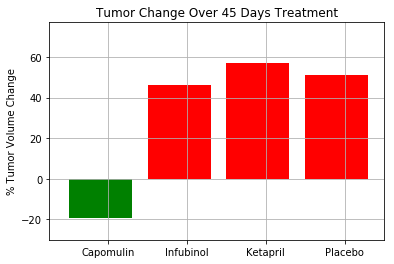

In [154]:
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls



#Index the 4 drugs
f_drugs=f_percentchange_tumorvolume.keys()
f_drugs
summary_bar = plt.subplot()
x_axis = np.arange(0, len(f_drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.5)
plt.xticks(tick_locations, f_drugs)
colors = []
for value in f_percentchange_tumorvolume:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')
        
 #Plot       
percent_change = summary_bar.bar(x_axis, f_percentchange_tumorvolume, color=colors, align="edge")

plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.25, len(f_drugs))
plt.ylim(-30, max(f_percentchange_tumorvolume) + 20)
plt.grid()


#Need to Label each Bar! 
#def autolabel(percent_change, summary_bar):

#    for i,percent in enumerate(percent_change):
#        height = int(summary_bar[i])
#        if height >= 0:
#            plt.text(percent.get_x()+percent.get_width()/2., 2, '%s%%'% (summary_bar[i]),
#                ha='center', va='bottom', color='white', weight='bold')
#        else:
 #           plt.text(rect.get_x()+percent.get_width()/2., -2, '%s%%'% (summary_bar[i]),
 #               ha='center', va='top', color='white', weight='bold')          


#autolabel(percent_change, summary_bar)



# Save the Figure
plt.savefig("f_TumorChange.png")

# Show the Figure
plt.show()







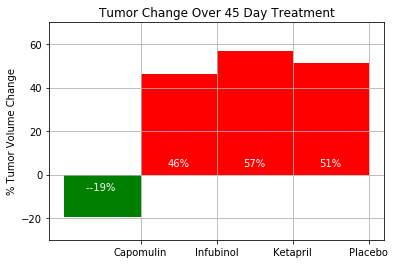

In [14]:
#Sample, Skip